## 1. Preliminary exploratory data analysis

In [ ]:
# Might need to install themis:
install.packages("themis", dependencies = TRUE)

also installing the dependencies ‘ipred’, ‘mlr’, ‘callr’, ‘processx’, ‘recipes’, ‘unbalanced’, ‘testthat’




In [5]:
# Libaries
library(tidyverse)
#library(testthat)
library(digest)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
library(RColorBrewer)
options(repr.matrix.max.rows = 6)

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3      ✔ yardstick 0.0.7 

Warning message:
“package ‘broom’ was built under R version 4.0.2”
Warning message:
“package ‘dials’ was built under R version 4.0.2”
Warning message:
“package ‘infer’ was built under R version 4.0.3”
Warning message:
“package ‘modeldata’ was built under R version 4.0.1”
Warning message:
“package ‘parsnip’ was built under R version 4.0.2”
Warning message:
“package ‘recipes’ was built under R version 4.0.1”
Warning message:
“package ‘tune’ was built under R version 4.0.2”
Warning message:
“package ‘workflows’ was built under R version 4.0.2”
Warning message:
“package ‘yardstick’ was built under R version 4.0.2”
── Conflicts ────

#### a) Demonstrate that the dataset can be read from the web into R, Clean and wrangle your data into a tidy format

In [6]:
# Reading the data using read_delim 
# using read_delim and taking it from a url, however taking the csv file from the original website also works)

red_wine_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

red_data <- read_delim(red_wine_url, delim = ";")

red_data

Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlorides = col_double(),
  `free sulfur dioxide` = col_double(),
  `total sulfur dioxide` = col_double(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_double()
)



fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5
6.0,0.310,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11.0,6


#### b) Clean and Wrangle Data

In [7]:
# Changing column names so they have underscores using colnames, allowing us to be able to work with them

colnames(red_data) <- c("fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", 
                             "chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide", "density", 
                             "ph", "sulfates", "alcohol", "quality")

#  convert quality to a factor using the function as_factor as we are working with it as a categorical statistical variable
red_data <- red_data %>%
                mutate(quality = as_factor(quality))

red_data

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulfates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5
6.0,0.310,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11.0,6


## 2. Split Data and Summarize

#### a) split data into training and testing

In [8]:
#Let's split our data into testing and training data, and look at the training data so we can apply exploraty analysis
#Using set seed to allow for reproducibility 

set.seed(69)
red_split<-initial_split(red_data, prop=0.75, strata = quality)
red_train<-training(red_split)
red_test<-testing(red_split)

red_train

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulfates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5
6.0,0.310,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11.0,6


#### b) Summarize the data into tables and visualizations

In [9]:
#Let's summarize the data by figuring out how many wines are in each class (each quality ranking)
set.seed(69)
red_wine_quality_count<- red_train %>% 
                       group_by(quality) %>%
                       summarize(count = n())
red_wine_quality_count


`summarise()` ungrouping output (override with `.groups` argument)


quality,count
<fct>,<int>
3,9
4,37
5,514
6,475
7,149
8,16


## 3. Predictor Variable Selection

#### a) Let's make some visualizations to see how different variables affect eachother, and how they relate to the class (quality)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



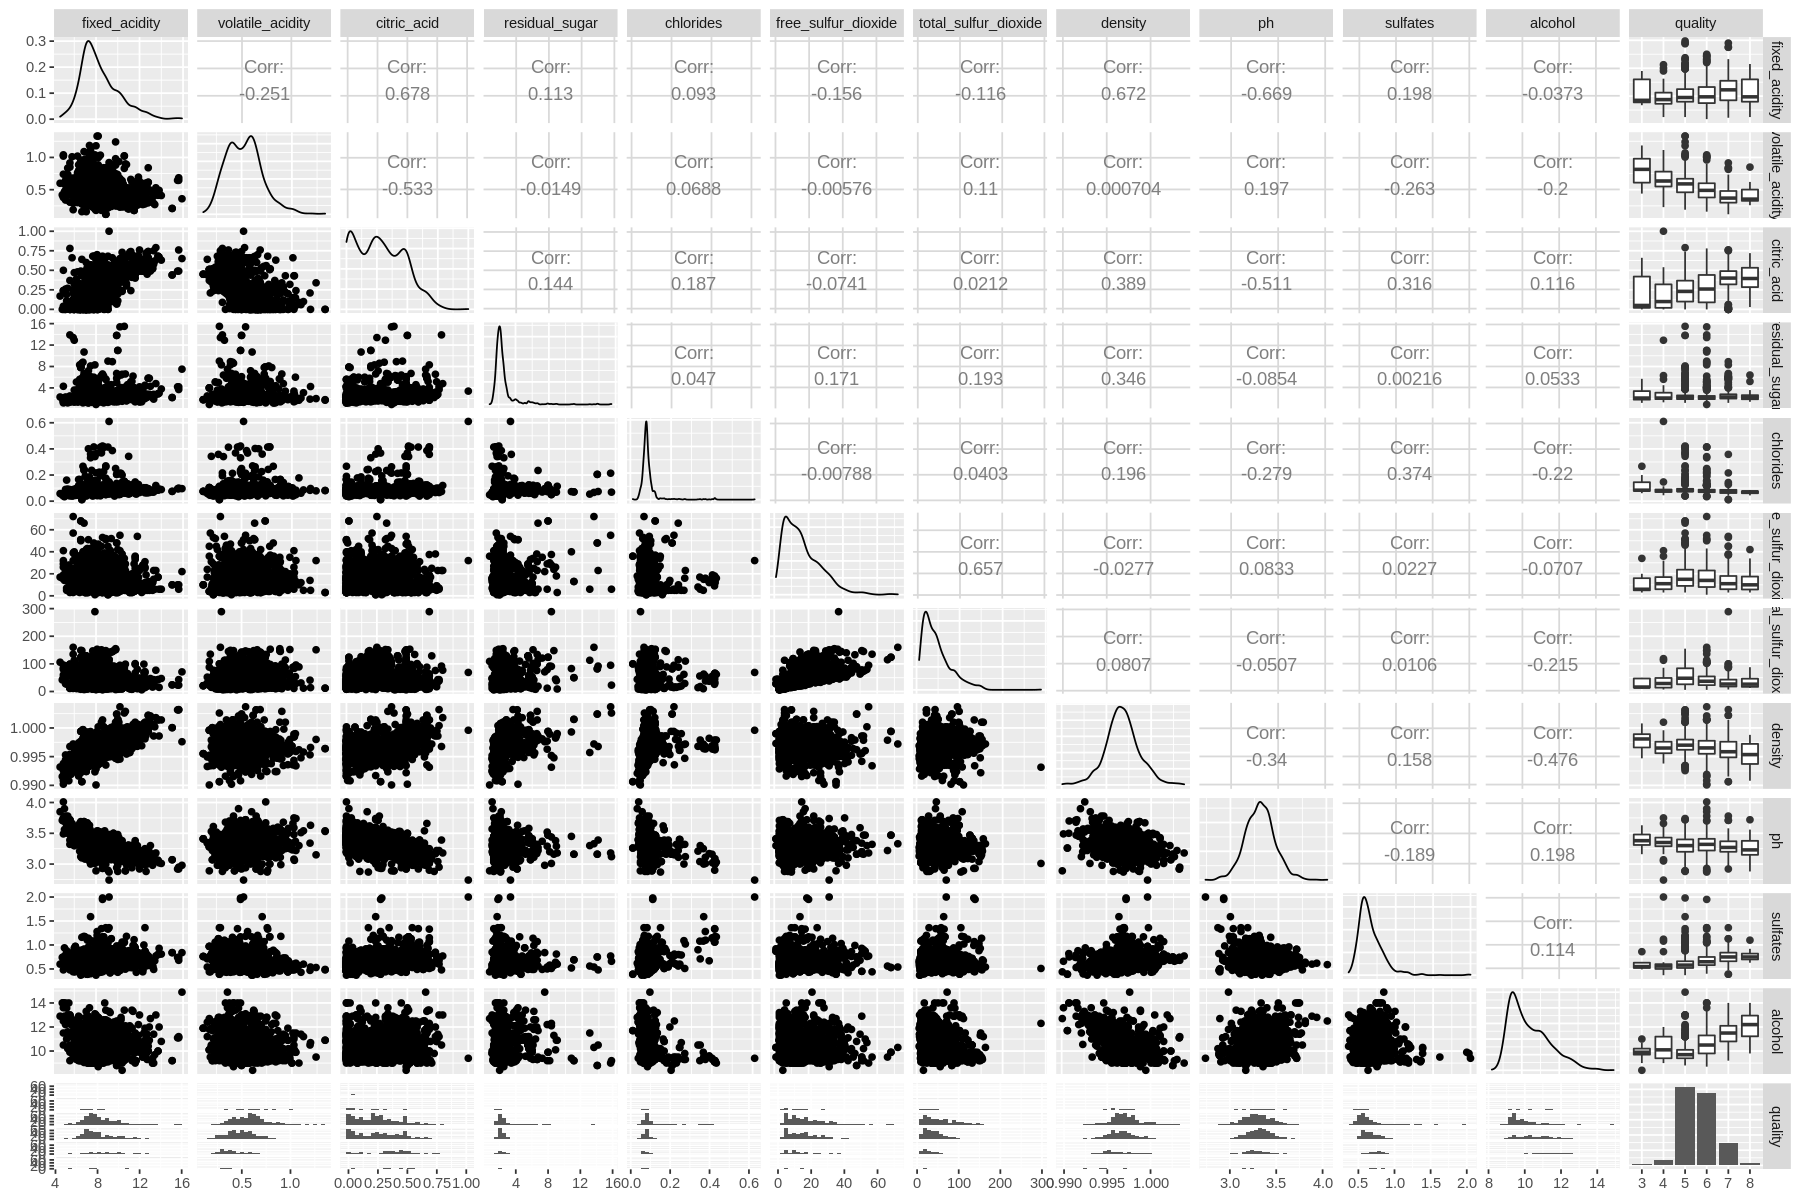

In [10]:
#Let's use the ggpairs function to determine which variables are related to quality the most, 
#to begin deciding what we want to use as predictor variables

set.seed(69)
options(repr.plot.height = 10, repr.plot.width = 15)

red_plot_intro<- ggpairs(red_train)
red_plot_intro

As we can see, for red wines, alcohol (0.485), sulfates (0.255), citric acidity (0.214), and volatile acidity (-0.384) have the highest correlation coefficients.

Let's look at an exploratory visualization of the two most strongly correlated variables and quality:

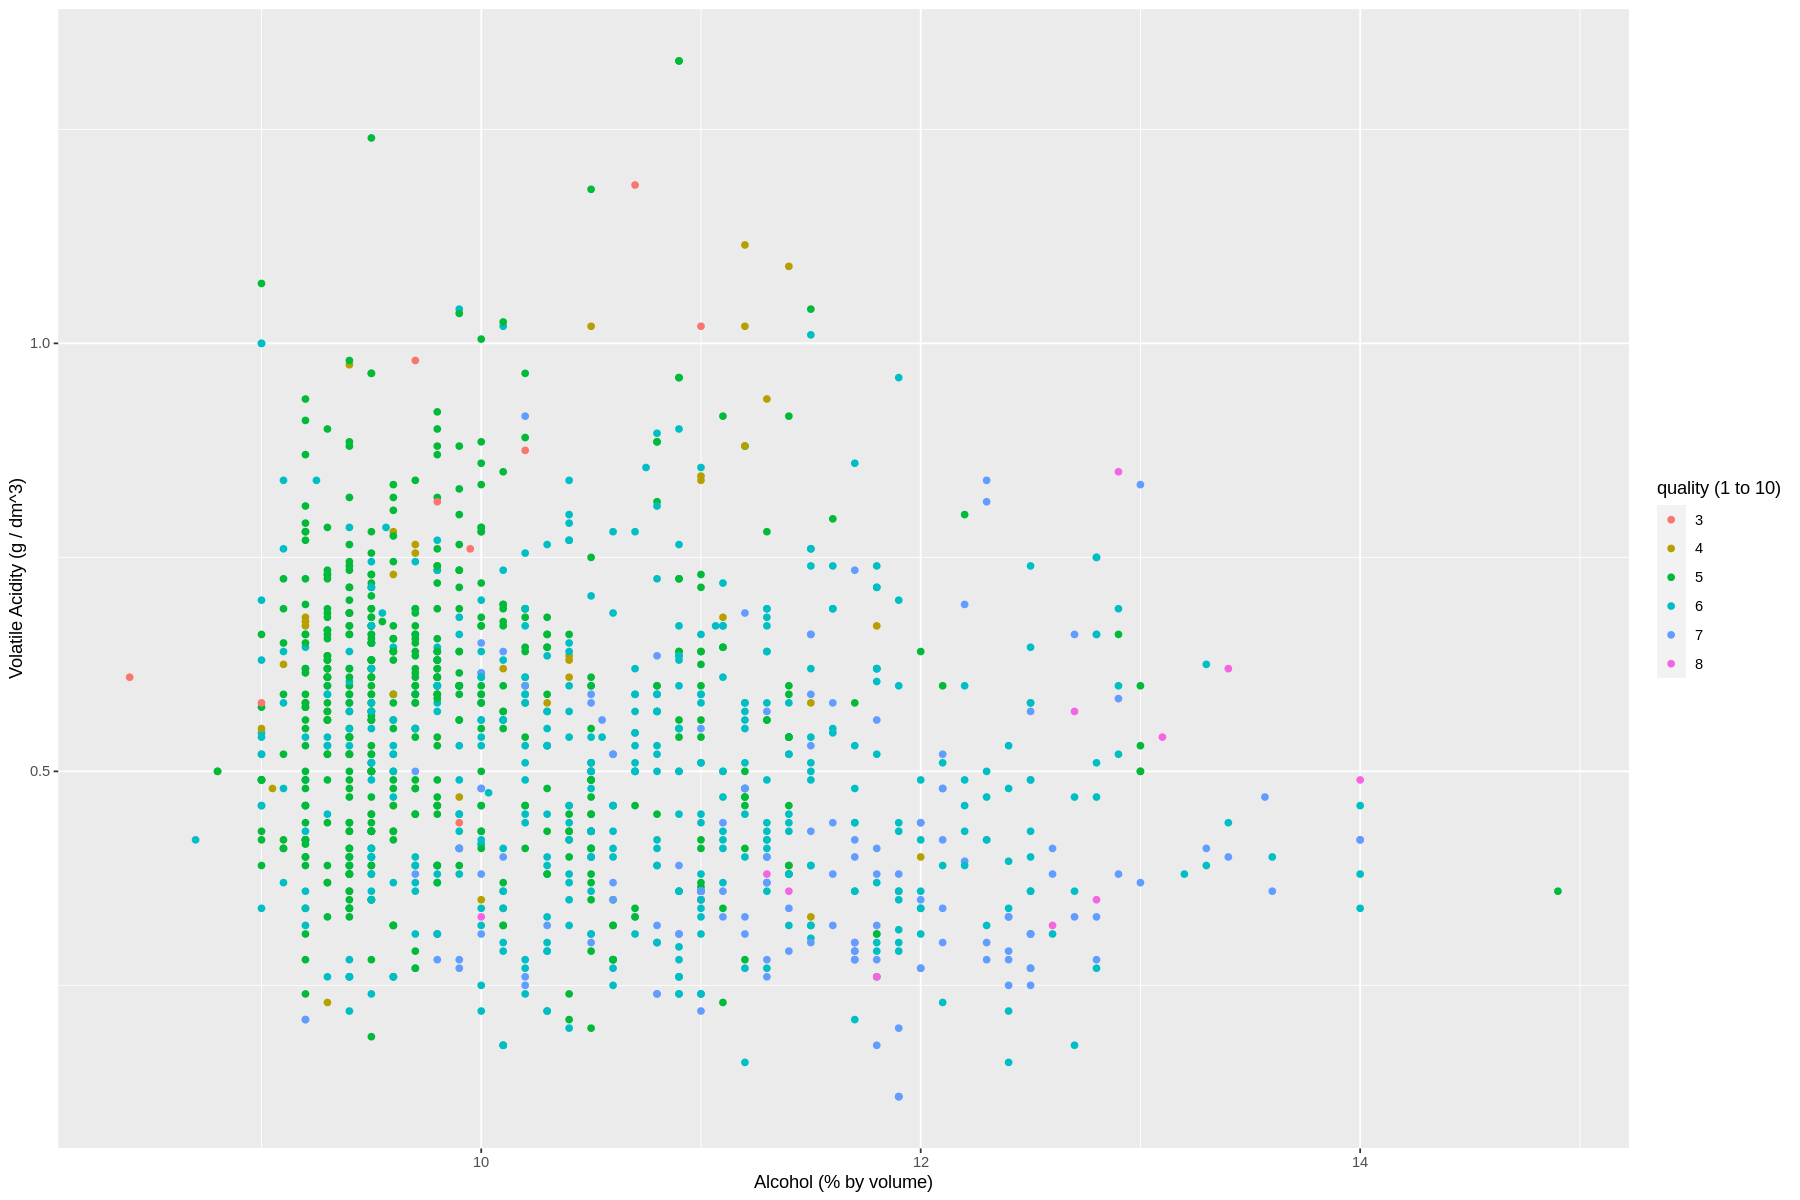

In [11]:
#Create a ggplot between alcohol and volatile acidity, using quality as color

red_plot_initial<-ggplot(red_train, aes(x = alcohol, y = volatile_acidity, color = quality))+
geom_point()+
labs(x = "Alcohol (% by volume)", y = "Volatile Acidity (g / dm^3)", color = "quality (1 to 10)" )

red_plot_initial

We can see that increasing alcohol shows a positive correlation with quality level. It is a little harder to visualize but there also seems to be a weak negative relationship between volatile acidity and quality

#### b) Apply forward selection to figure out the best selection of predictors based on the highest correlating variables from above

In [12]:
#Let's now go through forward selection to figure out the best selection of predictors

#Select the variables mentioned above (the top 4 variables for each wine level) and extract column names
wine_r_subset <- red_train %>%
  select(quality, 
         alcohol, 
         sulfates, 
         citric_acid, 
         volatile_acidity)

names <- colnames(wine_r_subset %>%
                  select(-quality))

wine_r_subset

quality,alcohol,sulfates,citric_acid,volatile_acidity
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
5,9.8,0.68,0.00,0.88
5,9.8,0.65,0.04,0.76
5,9.4,0.56,0.00,0.70
⋮,⋮,⋮,⋮,⋮
6,11.0,0.75,0.13,0.510
5,10.2,0.71,0.12,0.645
6,11.0,0.66,0.47,0.310


In [13]:
# Forward Selection

# create an empty tibble to store the results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) %>%
                             set_engine("kknn") %>%
                             set_mode("classification")

# create a 5-fold cross-validation object
red_vfold <- vfold_cv(wine_r_subset, v = 5, strata = quality)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("quality", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        red_recipe <- recipe(as.formula(model_string), 
                                data = wine_r_subset) %>%
                          step_scale(all_predictors()) %>%
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() %>%
          add_recipe(red_recipe) %>%
          add_model(knn_spec) %>%
          tune_grid(resamples = red_vfold, grid = 10) %>%
          collect_metrics() %>%
          filter(.metric == "accuracy") %>%
          summarize(mx = max(mean))
        acc <- acc$mx %>% unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies %>% 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}
accuracies

! Fold1: internal: No observations were detected in `truth` for level(s): '8'
Com...

! Fold1: internal: No observations were detected in `truth` for level(s): '8'
Com...

! Fold1: internal: No observations were detected in `truth` for level(s): '8'
Com...

! Fold1: internal: No observations were detected in `truth` for level(s): '8'
Com...

! Fold1: internal: No observations were detected in `truth` for level(s): '8'
Com...

! Fold1: internal: No observations were detected in `truth` for level(s): '8'
Com...

! Fold1: internal: No observations were detected in `truth` for level(s): '8'
Com...

! Fold1: internal: No observations were detected in `truth` for level(s): '8'
Com...

! Fold1: internal: No observations were detected in `truth` for level(s): '8'
Com...

! Fold1: internal: No observations were detected in `truth` for level(s): '8'
Com...



size,model_string,accuracy
<int>,<chr>,<dbl>
1,quality ~ alcohol,0.5466430
2,quality ~ alcohol+citric_acid,0.5816713
3,quality ~ alcohol+citric_acid+sulfates,0.5975326
4,quality ~ alcohol+citric_acid+sulfates+volatile_acidity,0.6124808


The best combination of predictors to choose from is alcohol, volatile acidity, sulfates, and citric acid.

## 4. Creating our Classification Model

In [14]:
# create the KNN model
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 7) %>%
  set_engine("kknn") %>%
  set_mode("classification")

# Create recipe
red_recipe <- recipe(quality ~ ., data = red_data) %>%
                step_scale(all_predictors()) %>%
                step_center(all_predictors()) %>%
                themis::step_upsample(Class, over_ratio = 1, skip = FALSE) %>%
                prep()

# Scale and balance data
scaled_red <- bake(red_recipe, red_data)



ERROR: Error in loadNamespace(name): there is no package called ‘themis’


In [15]:
set.seed(420) # DO NOT REMOVE

# Create recipe
red_knn_recipe1 <- recipe(quality ~ alcohol + volatile_acidity + sulfates + citric_acid, data = red_train) %>%
                        step_center(all_predictors()) %>%
                        step_scale(all_predictors())

# Create a model specification
red_knn_spec1 <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
                      set_engine("kknn") %>%
                      set_mode("classification")

# Create 5-fold cross-validation object
red_vfold1 <- vfold_cv(red_train, v = 5, strata = quality)

# Put the recipe and model specification together in a workflow.
red_knn_workflow1 <- workflow() %>%
                        add_recipe(red_knn_recipe1) %>%
                        add_model(red_knn_spec1)

# Run cross-validation for a grid of numbers of neighbors ranging from 1 to 400
gridvals1 <- tibble(neighbors = seq(1, 30))

red_knn_results1 <- red_knn_workflow1 %>%
                       tune_grid(resamples = red_vfold1, grid = gridvals1) %>%
                       collect_metrics() 

#select the value of k resulting in best RMSE
kmin1 <- red_knn_results1 %>%
               filter(.metric == 'accuracy') %>%
               arrange(desc(mean)) %>%
               slice(1) %>%
               pull(neighbors)
kmin1

red_class_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = kmin1) %>%
    set_engine("kknn") %>%
    set_mode("classification")

red_fit <- workflow() %>%
    add_recipe(red_knn_recipe1) %>%
    add_model(red_class_spec) %>%
    fit(red_train)

red_pred <- red_fit %>%
    predict(red_test) %>%
    bind_cols(red_test)

red_pred

! Fold2: internal: No observations were detected in `truth` for level(s): '3'
Com...



[1] 14

.pred_class,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulfates,alcohol,quality
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
5,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.8,0.58,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,7
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6,6.1,0.715,0.10,2.6,0.053,13,27,0.99362,3.57,0.50,11.9,5
7,7.5,0.310,0.41,2.4,0.065,34,60,0.99492,3.34,0.85,11.4,6
6,5.8,0.610,0.11,1.8,0.066,18,28,0.99483,3.55,0.66,10.9,6
